# Breast Cancer Recurrence Detection

- Number of Instances: 286

- Number of Attributes: 9 + the class attribute

- Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,
                  45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,
                 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
  10. irradiat:	yes, no.

- Missing Attribute Values: (denoted by "?")
   Attribute #:  Number of instances with missing values:
   6.             8
   9.             1.

- Class Distribution:
    1. no-recurrence-events: 201 instances
    2. recurrence-events: 85 instances

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('breast-cancer.csv', names=['recurrence-events', 'average-age', 'menopausal-state', 'tumor-size', 'average-inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiate'], index_col=False)
for c_name in df.columns:
    print(df[c_name].value_counts())

no-recurrence-events    201
recurrence-events        85
Name: recurrence-events, dtype: int64
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: average-age, dtype: int64
premeno    150
ge40       129
lt40         7
Name: menopausal-state, dtype: int64
30-34     60
25-29     54
20-24     50
15-19     30
Oct-14    28
40-44     22
35-39     19
50-54      8
0-4        8
05-Sep     4
45-49      3
Name: tumor-size, dtype: int64
0-2       213
03-May     36
06-Aug     17
09-Nov     10
15-17       6
Dec-14      3
24-26       1
Name: average-inv-nodes, dtype: int64
no     222
yes     56
?        8
Name: node-caps, dtype: int64
2    130
3     85
1     71
Name: deg-malig, dtype: int64
left     152
right    134
Name: breast, dtype: int64
left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64
no     218
yes     68
Name: irradiate, dtype: int64


#### Fixing corrupted data

In [3]:
df['tumor-size'].replace({'Oct-14' : '10-14', '05-Sep':'5-9'}, inplace=True)
df['average-inv-nodes'].replace({'03-May':'3-5', '06-Aug':'6-10', '09-Nov':'9-11', 'Dec-14':'10-14'}, inplace=True)

In [4]:
for column in ['node-caps', 'breast-quad']:
    filt = (df[column] == '?')
    print(df[column].value_counts())
    df.drop(index=df[filt].index, inplace=True)

no     222
yes     56
?        8
Name: node-caps, dtype: int64
left_low     106
left_up       94
right_up      33
right_low     23
central       21
?              1
Name: breast-quad, dtype: int64


#### Visualising The Dataset

#### Replacing ranges with values that can be fed into the nueral networks

In [5]:
df['recurrence-events'].replace({'recurrence-events' : 1, 'no-recurrence-events' : 0}, inplace=True)
df['menopausal-state'].replace({'premeno': 0, 'ge40':1, 'lt40':2}, inplace=True)
df['node-caps'].replace({'no':0, 'yes':1}, inplace=True)
df['breast'].replace({'left':0, 'right':1}, inplace=True)
df['breast-quad'].replace({'left_low':0, 'left_up':1, 'right_low':2, 'right_up':3, 'central':4}, inplace=True)
df['irradiate'].replace({'no':0, 'yes':1}, inplace=True)

In [6]:
def avg(s):
    i, j = map(int, s.split('-'))
    return (i+j)/2
for k in ['average-age', 'tumor-size', 'average-inv-nodes']:
    df[k] = df[k].apply(avg)

In [7]:
for c_name in df.columns:
    print(df[c_name].value_counts())

0    196
1     81
Name: recurrence-events, dtype: int64
54.5    91
44.5    89
64.5    55
34.5    36
74.5     5
24.5     1
Name: average-age, dtype: int64
0    149
1    123
2      5
Name: menopausal-state, dtype: int64
32.0    57
27.0    51
22.0    48
17.0    29
12.0    28
42.0    22
37.0    19
52.0     8
2.0      8
7.0      4
47.0     3
Name: tumor-size, dtype: int64
1.0     209
4.0      34
8.0      17
10.0      7
16.0      6
12.0      3
25.0      1
Name: average-inv-nodes, dtype: int64
0    221
1     56
Name: node-caps, dtype: int64
2    129
3     82
1     66
Name: deg-malig, dtype: int64
0    145
1    132
Name: breast, dtype: int64
0    106
1     94
3     33
2     23
4     21
Name: breast-quad, dtype: int64
0    215
1     62
Name: irradiate, dtype: int64


In [8]:
print(df.shape)

(277, 10)


In [9]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [10]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size=0.8)

In [11]:
scaler = MinMaxScaler()
scaler.fit_transform(train_x)
scaler.transform(test_x)
print()

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=500,
                    momentum=0.6,
                    nesterovs_momentum=False,
                    validation_fraction=0.1,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-08
                   )

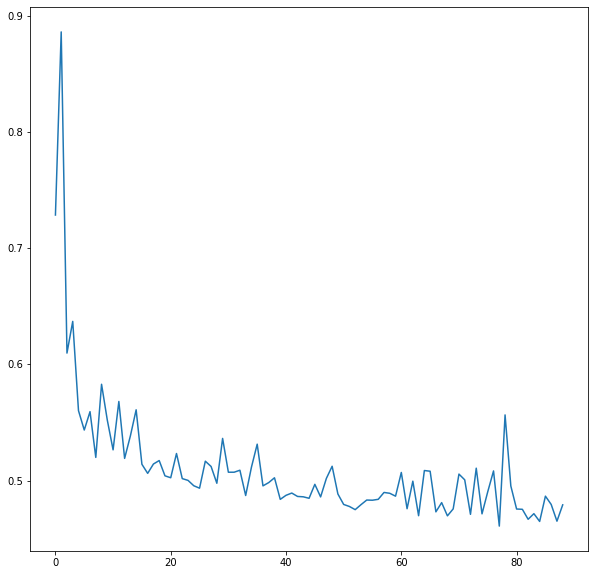

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

mlp.fit(train_x, train_y)
plt.plot(mlp.loss_curve_)

In [20]:
prediction = mlp.predict(test_x)

In [21]:
r = ((prediction == test_y).value_counts())

In [22]:
print('%.2f' % ((r[1]/(r[0]+r[1]))*100))

60.71
